Лабораторная работа №1 по теме: Шифр Цезаря

Команда №1: Банников Алексей Алексеевич и Гнездилов Владимир Владимирович

Шифр Цезаря, также известный, как шифр сдвига, код Цезаря или сдвиг Цезаря — один из самых простых и наиболее широко известных методов шифрования.

Шифр Цезаря — это вид шифра подстановки, суть которого состоит в следующем: каждый символ в тексте заменяется символом находящимся на некотором одинаковом промежутке левее или правее него в выбранном алфавите. Например, в шифре с русским алфавите со сдвигом 3, "А" была бы заменена на "Г", "Б" станет "Д", и так далее.

Историческая справка: Шифр назван в честь римского императора Гая Юлия Цезаря, использовавшего его для секретной переписки со своими генералами.

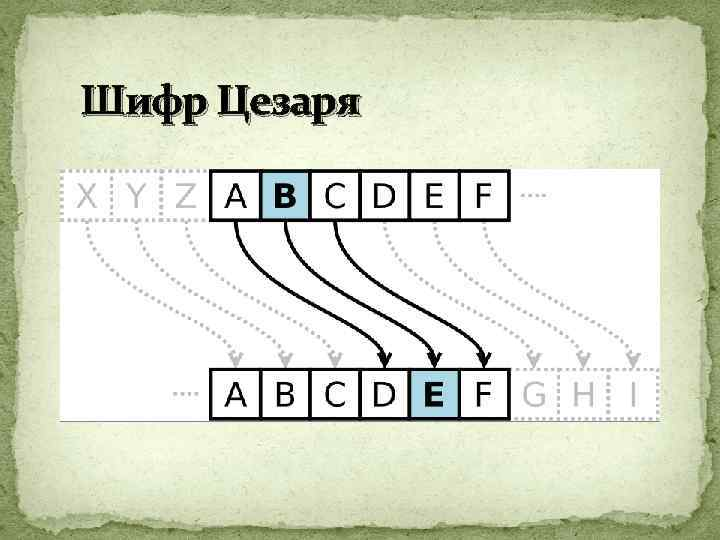

1. Шифрование

Код ниже основан на теоритическом материале приведённом сверху. В нём реализовано шифрование, при условии что нам известен шаг. На вход этот самый шаг подаётся вместе с текстом. Алфавит мы задали вручную (русский). Кстати, мы учли тот случай, когда шаг больше алфавита. Код всё равно будет работать.

In [ ]:
ALPHABET_CONST_1 = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'#Основной алфавит
ALPHABET_CONST_2= ALPHABET_CONST_1.upper()#алфавит в вверхнем регистре
LENGTH= [a for a in range(len(ALPHABET_CONST_1))]#номера каждой буквы
SMALL_LETTES= {c: LENGTH[ALPHABET_CONST_1.find(c)] for c in ALPHABET_CONST_1}#cловарь с ключами для маленьких букв
CAPITAL_LETTERS = {c: LENGTH[ALPHABET_CONST_2.find(c)] for c in ALPHABET_CONST_2}#cловарь с ключами для больших букв
LENGTH_ALPHABET=len(ALPHABET_CONST_1)

bias= int(input("Введите шаг: "))
str = ""
text = input("Введите текст: ").split()
for j in text :#процесс шифрования через пробег по алфавиту вперед
    for i in j:
        if ALPHABET_CONST_1.count(i) != 0:
            str += ALPHABET_CONST_1[(SMALL_LETTES[i] + bias) % LENGTH_ALPHABET]
        elif ALPHABET_CONST_2.count(i) != 0:
            str+= ALPHABET_CONST_2[(CAPITAL_LETTERS[i] + bias) % LENGTH_ALPHABET]
        else:
            str += i
    str += " "
print("Закодированный текст: "+str, end="")

Введите шаг: 5
Введите текст: Вовус бебра
Закодированный текст: Жужшц ёйёхе 

2. Дешифрование при известном шаге

Для реализации дешифрования используется всё тот же метод смещения. Но с тем различием, что смещение происходит в обратную сторону. При этом на вход подаётся тот же шаг и текст, но уже закодированный. Алфавит, как и при шифровании, вводим вручную.

In [ ]:
ALPHABET_CONST_1 = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'#Основной алфавит
ALPHABET_CONST_2= ALPHABET_CONST_1.upper()#алфавит в вверхнем регистре
LENGTH= [a for a in range(len(ALPHABET_CONST_1))]#номера каждой буквы
SMALL_LETTES= {c: LENGTH[ALPHABET_CONST_1.find(c)] for c in ALPHABET_CONST_1}#cловарь с ключами для маленьких букв
CAPITAL_LETTERS = {c: LENGTH[ALPHABET_CONST_2.find(c)] for c in ALPHABET_CONST_2}#cловарь с ключами для больших букв
LENGTH_ALPHABET=len(ALPHABET_CONST_1)

bias= int(input("Введите шаг: "))
str = ""
text = input("Введите зашифрованный текст: ").split()
for j in text :#процесс шифрования через пробег по алфавиту назад смещения
    for i in j:
        if ALPHABET_CONST_1.count(i) != 0:
            str += ALPHABET_CONST_1[(SMALL_LETTES[i] - bias) % LENGTH_ALPHABET]
        elif ALPHABET_CONST_2.count(i) != 0:
            str+= ALPHABET_CONST_2[(CAPITAL_LETTERS[i] - bias) % LENGTH_ALPHABET]
        else:
            str += i
    str += " "
print("Дешифрованный текст: ",str, end="")

Введите шаг: 5
Введите зашифрованный текст: Жужшц ёйёхе
Дешифрованный текст:  Вовус бебра 

3. Взломщик при неизвестном шаге

Для реализации взлома мы использовали метод перебора. Работает это следующим образом: имея зашифрованный текст, к каждой букве применяем смещение от 0 вплоть до длины самого алфавита (мы преположили, что шаг не привышает его размера), а затем выводим результат к каждому шагу на экран.

In [ ]:
ALPHABET_CONST_1 = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'#Основной алфавит
ALPHABET_CONST_2= ALPHABET_CONST_1.upper()#алфавит в вверхнем регистре
LENGTH= [a for a in range(len(ALPHABET_CONST_1))]#номера каждой буквы
SMALL_LETTES= {c: LENGTH[ALPHABET_CONST_1.find(c)] for c in ALPHABET_CONST_1}#cловарь с ключами для маленьких букв
CAPITAL_LETTERS = {c: LENGTH[ALPHABET_CONST_2.find(c)] for c in ALPHABET_CONST_2}#cловарь с ключами для больших букв
LENGTH_ALPHABET=len(ALPHABET_CONST_1)

text = input("Введите зашифрованный текст: ").split()
for bias in LENGTH:#перебираем все допустимые значения
    str = " "
    for j in text :#процесс дешифрования через пробег по алфавиту назад
        for i in j:
            if ALPHABET_CONST_1.count(i) != 0:
                str += ALPHABET_CONST_1[(SMALL_LETTES[i] - bias) % LENGTH_ALPHABET]
            elif ALPHABET_CONST_2.count(i) != 0:
                str+= ALPHABET_CONST_2[(CAPITAL_LETTERS[i] - bias) % LENGTH_ALPHABET]
            else:
                str += i
        str += " "
    print("Смещение на:", bias, "Дешифрованный текст:",str)

Введите зашифрованный текст: Жужшц ёйёхе
Смещение на: 0 Дешифрованный текст:  Жужшц ёйёхе 
Смещение на: 1 Дешифрованный текст:  Ётёчх еиефд 
Смещение на: 2 Дешифрованный текст:  Есецф дздуг 
Смещение на: 3 Дешифрованный текст:  Дрдху гжгтв 
Смещение на: 4 Дешифрованный текст:  Гпгфт вёвсб 
Смещение на: 5 Дешифрованный текст:  Вовус бебра 
Смещение на: 6 Дешифрованный текст:  Бнбтр адапя 
Смещение на: 7 Дешифрованный текст:  Амасп ягяою 
Смещение на: 8 Дешифрованный текст:  Яляро ювюнэ 
Смещение на: 9 Дешифрованный текст:  Юкюпн эбэмь 
Смещение на: 10 Дешифрованный текст:  Эйэом ьаьлы 
Смещение на: 11 Дешифрованный текст:  Ьиьнл ыяыкъ 
Смещение на: 12 Дешифрованный текст:  Ызымк ъюъйщ 
Смещение на: 13 Дешифрованный текст:  Ъжълй щэщиш 
Смещение на: 14 Дешифрованный текст:  Щёщки шьшзч 
Смещение на: 15 Дешифрованный текст:  Шешйз чычжц 
Смещение на: 16 Дешифрованный текст:  Чдчиж цъцёх 
Смещение на: 17 Дешифрованный текст:  Цгцзё хщхеф 
Смещение на: 18 Дешифрованный текст:  Хвхже фшфду 
